# Convolution of matrices

>*Convolution of matrices is a mathematical operation applied in various fields, including signal processing and machine learning. This operation plays a crucial role in image processing and data analysis, particularly in tasks involving filtering and feature extraction.*

## 1-d convolution

>*1-d convolution refers to the mathematical operation applied to one-dimensional sequences or arrays. It is commonly used for tasks such as feature extraction, signal processing, and sequence analysis.*

### Convolution of sequences

The convolution of sequences $(a_n)$ and $(b_n)$ is the sequence $a * b$ such that
$$(a * b)_n = \sum\limits_k a_k b_{n-k} $$




This formula assumes that the sequences $(a_n)$ and $(b_n)$ continue indefinitely to both sides. To calculate the convolution of finite sequences

$$
    a_0, \ldots, a_{\ell-1}, \quad b_0, \ldots, b_{m-1}
$$

they are padded by zeros: 

* $a_k = 0$ if $k < 0$ or $k \geqslant \ell$;

* $b_k = 0$ if $k < 0$ or $k \geqslant m$.

```{admonition} Exercise
:class: important
Let $(a_n) = (1, 2, 3)$, $(b_n) = (4, 5)$. Calculate their convolution.
```


```{admonition} Question
:class: important
How many nonzero elements are there in {eq}`1-d-conv` for these finite sequences?
```

In practice there are several reasonable strategies how to caclulate convolutions.

* `full`: find $(a * b)_n$ for all $n$ such that 

    $$
        a_0, \ldots, a_{\ell-1} \text{  and  } \quad b_{n-m+1}, \ldots, b_{n}
    $$

    have at least one nonzero intersection, the shape of $(a * b)_n$ is $\ell + m - 1$;

* `same`: the convolution has the same shape as the largest input sequence, the shape of $c_n$ is $\max\{\ell, m\}$;

* `valid`: the convolution product is only given for points where the sequences overlap completely, the  shape of $c_n$ is $\max\{\ell, m\} - \min\{\ell, m\} + 1$.

### Convolution in NumPy

Use [`np.convolve`](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html):

In [15]:
import numpy as np

a = np.array([1, 2, 3])
b = np.array([4, 5])
print("Full:", np.convolve(a, b, mode='full'))
print("Same:", np.convolve(a, b, mode='same'))
print("Valid:", np.convolve(a, b, mode='valid'))

Full: [ 4 13 22 15]
Same: [ 4 13 22]
Valid: [13 22]


### Cross correlation

This is a very similar operation to convolution. The cross correlation of sequences $(a_n)$ and $(b_n)$ is a sequence $(c_n)$ such that


$$ c_n = \sum\limits_k a_{n+k} b_k$$


[`np.correlate`](https://numpy.org/doc/stable/reference/generated/numpy.correlate.html) calculates the cross correlation of two arrays. The meaning of the parameters `full`, `same`, `valid` is analogous to those of [`np.convolve`](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html):

In [17]:
print("Full:", np.correlate(a, b, mode='full'))
print("Same:", np.correlate(a, b, mode='same'))
print("Valid:", np.correlate(a, b, mode='valid'))

Full: [15 22 13  4]
Same: [15 22 13]
Valid: [22 13]


question

````{admonition} Question
:class: important
How to express cross correlation it terms of convolution?

```{admonition} Answer
:class: tip, dropdown
Denote $(x^-_n)$ the flipped sequence: $x^-_n = x_{-n}$. Now $c_n$ from {eq}`1-d-cross-corr` is

$$
    c_n = \sum\limits_k a^-_{-n-k} b_k = (a^- * b)_{-n}=(a^- * b)^-_n.
$$

Alternatively, we can write it as

$$
    c_n = \sum\limits_k a_{n+k} b^-_{-k} = \sum\limits_k a_j b^-_{n-j} = (a * b^-)_n.
$$

Thus, the cross correlation can be represented as a convolution of two initial sequences exactly one of which is flipped.
```
````

In [24]:
print("Convolution:", np.convolve(a, b, mode='full'))
print("Correlation, flip first:", np.correlate(a[::-1], b, mode='full')[::-1])
print("Correlation, flip second:", np.correlate(a, b[::-1], mode='full'))

Convolution: [ 4 13 22 15]
Correlation, flip first: [ 4 13 22 15]
Correlation, flip second: [ 4 13 22 15]


## 2-d convolution

Convolution is a mathematical operation that takes **two matrices** and merges them into a **third matrix**. In convolutional neural networks, the first matrix is called the **input matrix(A)**, the second is a **kernel/filter(B)**, and the output matrix is called the **feature map**. In this Answer, we will explore how to perform convolution as matrix multiplication. It helps in image processing and computer vision to extract features from an image.

>*The principles of 2-d convolution are similar to those of 1-d convolution but applied to two-dimensional data.*

### Input matrix

The input matrix entails the RGB values of the image. To show how convolution is applied on matrices, let us consider a 4x4 matrix (input matrix). The matrix is shown below:


<div style="display: flex; justify-content: center;">
    <img src="C:\Users\Janareis\cnn-conv_2d\_build\html\_images\inputmatrix.png" alt="input matrix" style="width: 50%;">
</div>

<h4><center>4x4 input matrix</center></h4>


### Kernel/Filter matrix

To apply the convolution operation, let's take the second matrix (kernel/filter) as shown in the illustration below:
<div style="display: flex; justify-content: center;">
    <img src="C:\Users\Janareis\cnn-conv_2d\_build\html\_images\kernel1.png" alt="kernel matrix" width = 200, height = 200>
</div>


<h4><center>2x2 kernel matrix</center></h4>

### Convolution operation

For two matrices $\boldsymbol A$(input matrix) and $\boldsymbol B$(kernel matrix) their **convolution** is defined a

$$
    (\boldsymbol A * \boldsymbol B)_{k\ell} = \sum\limits_i \sum \limits_j A_{ij} B_{k-i, \ell-j}.
$$

Once again matrices are padded by zeros outside their shape.

The convolution operation is denoted by the asterisk (*) sign, as shown below:

<img src = 'C:\Users\Janareis\cnn-conv_2d\_build\html\_images\conv.png' width = 600, height = 350>

<h4><center>Demonstration of the convolution operation symbol</center></h4>

In [41]:


from IPython.display import HTML, display, Javascript


image_paths = [r"C:\Users\Janareis\cnn-conv_2d\_build\html\_images\1.png",r"C:\Users\Janareis\cnn-conv_2d\_build\html\_images\2.png",
               r"C:\Users\Janareis\cnn-conv_2d\_build\html\_images\3.png",r"C:\Users\Janareis\cnn-conv_2d\_build\html\_images\4.png",
               r"C:\Users\Janareis\cnn-conv_2d\_build\html\_images\5.png",r"C:\Users\Janareis\cnn-conv_2d\_build\html\_images\6.png",
               r"C:\Users\Janareis\cnn-conv_2d\_build\html\_images\7.png",r"C:\Users\Janareis\cnn-conv_2d\_build\html\_images\8.png",r"C:\Users\Janareis\cnn-conv_2d\_build\html\_images\9.png" ]


html_code = """
<div id="slideshow-container" style="max-width: 800px; margin: auto;">
    %s
    <div align="middle">
        <button class="btn" onclick="plusSlides(-1)">❮ Back</button>
        <button class="btn" onclick="plusSlides(1)">Next ❯</button>
    </div>
</div>

<script>
    var slideIndex = 0;

    function showSlide(n) {
        var slides = document.getElementsByClassName("mySlides");
        slideIndex += n;
        if (slideIndex >= slides.length) {slideIndex = 0}
        if (slideIndex < 0) {slideIndex = slides.length - 1}
        for (var i = 0; i < slides.length; i++) {
            slides[i].style.display = "none";  
        }
        slides[slideIndex].style.display = "block";  
    }

    function plusSlides(n) {
        showSlide(n);
    }

    // Показать первый слайд сразу
    showSlide(0);
</script>
"""





In [42]:
slide_code = ""
for i, path in enumerate(image_paths):
    display_style = "block" if i == 0 else "none"
    slide_code += f'<img class="mySlides" src="{path}" alt="Alt text" style="width:100%; display:{display_style}">\n'

html_code = html_code % slide_code


display(HTML(html_code))

In [77]:
from scipy.signal import convolve2d

A = np.arange(12).reshape(3, 4)
B = np.array([[2, 0], [1, -1]])
print("Full:")
print(convolve2d(A, B, mode='full'))
print("Same:")
print(convolve2d(A, B, mode='same'))
print("Valid:")
print(convolve2d(A, B, mode='valid'))

Full:
[[  0   2   4   6   0]
 [  8  11  13  15  -3]
 [ 20  19  21  23  -7]
 [  8   1   1   1 -11]]
Same:
[[ 0  2  4  6]
 [ 8 11 13 15]
 [20 19 21 23]]
Valid:
[[11 13 15]
 [19 21 23]]


What about [pyTorch](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)? Note that to proceed in the `full` mode we can pad $\boldsymbol A$ by one zero from each side.

In [66]:
import torch
from torch import nn

conv = nn.Conv2d(1, 1, 3, bias=False, padding=1)
conv.weight = nn.parameter.Parameter(torch.FloatTensor(B[None, None, :, :]))
print("Full:")
print(conv(torch.FloatTensor(A[None, None, :, :])).detach().numpy().squeeze())

conv = nn.Conv2d(1, 1, 3, bias=False, padding='same')
conv.weight = nn.parameter.Parameter(torch.FloatTensor(B[None, None, :, :]))
print("Same:")
print(conv(torch.FloatTensor(A[None, None, :, :])).detach().numpy().squeeze())

conv = nn.Conv2d(1, 1, 3, bias=False, padding='valid')
conv.weight = nn.parameter.Parameter(torch.FloatTensor(B[None, None, :, :]))
print("Valid:")
print(conv(torch.FloatTensor(A[None, None, :, :])).detach().numpy().squeeze())

Full:
[[ 0. -1. -1. -1.  3.]
 [-4. -1.  1.  3. 13.]
 [-8.  7.  9. 11. 25.]
 [ 0. 16. 18. 20. 22.]]
Same:
[[-1.  1.  3. 13.]
 [ 7.  9. 11. 25.]
 [16. 18. 20. 22.]]
Valid:
[[-1.  1.  3.]
 [ 7.  9. 11.]]


````{warning}
The outputs of [`scipy.signal.convolve2d`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html) and [`torch.nn.conv2d`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)look different. What is the reason of it?

```{admonition} Answer
:class: tip, dropdown
Pytorch calculates not convolution but **cross correlation**:

$$
    (\boldsymbol A \circledast \boldsymbol B)_{k\ell} = \sum\limits_i \sum \limits_j A_{ij} B_{k+i, \ell+j}.
$$

```
````

### Image convolution

Grayscale images of size $H\times W$ are stored as matrices of shape $H\times W$. Here is an example: 

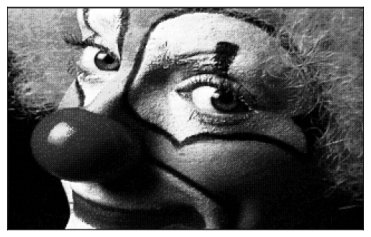

In [67]:
import numpy as np
import matplotlib.pyplot as plt 
import requests
import io
from PIL import Image

%config InlineBackend.figure_format = 'svg'

r = requests.get('https://github.com/probml/probml-data/blob/main/data/clown.png?raw=true', stream=True)
img = Image.open(io.BytesIO(r.content))
X = np.array(img) / 255
plt.xticks([])
plt.yticks([])
plt.imshow(X, cmap="gray");

The shape is $H\times W = 200\times 320$:

In [68]:
X.shape

(200, 320)

Convolving with kernel $K = \frac 1{n^2} \boldsymbol 1_{n\times n}$
averages the values of each pixel with its neigbours, so the image becomes blurred:

In [69]:
def blur_image(X, n):
    kernel = np.ones((n, n)) / n**2
    blurred_image = convolve2d(X, kernel, mode="same")
    plt.xticks([])
    plt.yticks([])
    plt.imshow(blurred_image, cmap="gray");

$n=3$:

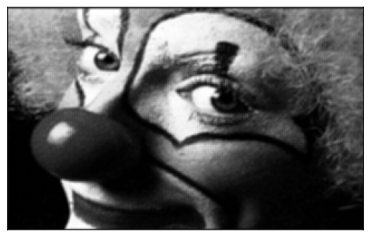

In [70]:
blur_image(X, 3)

$n = 8$:

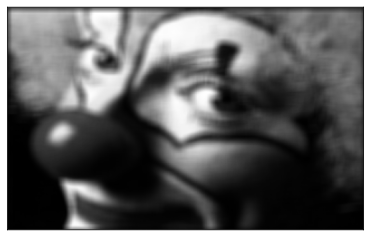

In [71]:
blur_image(X, 8)

Now what if we convolve the image with kernel

$$
\begin{pmatrix}
        -1 & -1 & -1 \\
        -1 & 8 & -1 \\ 
        -1 & -1 & -1
\end{pmatrix}?
$$

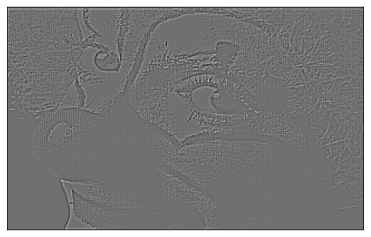

In [72]:
kernel = -np.ones((3, 3))
kernel[1, 1] = 8
blurred_image = convolve2d(X, kernel, mode="same")
plt.xticks([])
plt.yticks([])
plt.imshow(blurred_image, cmap="gray");

### Stride

Sometimes convolution are used with **stride** greater than one. To calculate the next element of the convolution the filter is moved by `stride` units. Here is a gif of a convolution with stride equal to $2$:

```{figure} https://upload.wikimedia.org/wikipedia/commons/0/04/Convolution_arithmetic_-_Padding_strides.gif
:align: center
```


```{admonition} Exercise
:class: important
Calculate both convolution and cross correlation for the same matrices

$$
    \boldsymbol A = \begin{pmatrix}
        0 & 1 & 2 & 3 \\
        4 & 5 & 6 & 7 \\ 
        8 & 9 & 10 & 11
    \end{pmatrix}, \quad
    \boldsymbol B = \begin{pmatrix}
        2 & 0 \\
        1 & -1
    \end{pmatrix}.
$$

with stride $2$ in mode `full`.
```

Check with pyTorch:

In [73]:
conv = nn.Conv2d(1, 1, 3, bias=False, padding=1, stride=2)
conv.weight = nn.parameter.Parameter(torch.FloatTensor(B[None, None, :, :]))
print(conv(torch.FloatTensor(A[None, None, :, :])).detach().numpy().squeeze())

[[ 0. -1.  3.]
 [-8.  9. 25.]]


### Dilation

The kernel can be multiplied not only to contiguous pieces of input, they can be separated by several cells. This is regulated by the **dilation** parameter. Here is a gif of a convolution with dilation equal to $2$:

```{figure} https://upload.wikimedia.org/wikipedia/commons/c/c1/Convolution_arithmetic_-_Dilation.gif
:align: center
```


In [12]:
from jupyterquiz import display_quiz

questions = [
    {
        'question': 'What does the "dilation" technique involve in the context of convolutions?',
        'type': 'multiple_choice',
        'answers': [
            {'answer': 'The size of the convolution filter', 'correct': False, 'feedback': 'Not correct!'},
            {'answer': 'A technique to enhance contrast in images.', 'correct': False, 'feedback': 'Not correct.'},
            {'answer': 'Increasing the gap between values within the convolution kernel', 'correct': True, 'feedback': 'Hallelujah.'},
            {'answer': 'Applying the activation function to the output of the convolutional layer.', 'correct': False, 'feedback': 'I hope not).'}
        ]
    }
    
]

In [13]:
display_quiz(questions, colors = 'fdsp' )

<IPython.core.display.Javascript object>

```{admonition} Exercise
:class: important
Calculate both convolution and cross correlation for the same matrices

$$
    \boldsymbol A = \begin{pmatrix}
        0 & 1 & 2 & 3 \\
        4 & 5 & 6 & 7 \\ 
        8 & 9 & 10 & 11
    \end{pmatrix}, \quad
    \boldsymbol B = \begin{pmatrix}
        2 & 0 \\
        1 & -1
    \end{pmatrix}.
$$

with dilation $2$ in mode `same`.
```

Check with pyTorch:

In [75]:
conv = nn.Conv2d(1, 1, 3, bias=False, dilation=2, padding='same')
conv.weight = nn.parameter.Parameter(torch.FloatTensor(B[None, None, :, :]))
print(conv(torch.FloatTensor(A[None, None, :, :])).detach().numpy().squeeze())

[[-5. -2. -2.  6.]
 [-9. -2.  0. 14.]
 [ 0.  8. 10. 12.]]


### Output shape formula

Convolutions have a lot of parameters. How do they affect the shape of the convolved image?

Suppose that

* input image has shape $H\times W$;

* kernel has shape $h\times w$;

* the imput image is padded by $p$ zeros from each side ($p \geqslant 0$);

* stride is $s$ (by default $s=1$);

* dilation is $d$ (by default $d=1$).

Then the height of the convolved image is

$$
    H_{\mathrm{out}} = \bigg\lfloor \frac{H + 2p - 1 - d(h-1)}s + 1 \bigg\rfloor
$$

and the width is

$$
    W_{\mathrm{out}} = \bigg\lfloor \frac{W + 2p - 1 - d(w-1)}s + 1 \bigg\rfloor.
$$

For example, if $s=d=1$, $h=w = 2k+1$, $p=k$, then

$$
H_{\mathrm{out}} = H + 2k - 1 - 2k + 1 = H, \quad
W_{\mathrm{out}} = W + 2k - 1 - 2k + 1 = W.
$$

This is how `same` mode is achieved.